# Data Preprocessing and EDA

This code converts the data to a cleaner format and then conducts data analysis.

This first section requires the raw data to be in the correct location so may not run in the notebook.

## Data Preprocessing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
import numpy as np
import seaborn as sns
from statistics import mean

import glob
import csv

In [ ]:
# Set path to files
path = '/Users/OwenO/Downloads/train'
# This bit will allow us to cycle through all files in the folder
all_files = glob.glob(path + "/*.csv")

# Read in each file from the folder and add them to the list
# WARNING This may not read in the CSVs in the order they were in in the folder
for filename in all_files:
    df = pd.read_csv(filename, header=None, skiprows=7, sep='\n',
                     skip_blank_lines=False, quoting=csv.QUOTE_NONE)
    df = df[0].str.split(',', expand=True)

    cdata = pd.DataFrame(columns=['Time', 'BT', 'Acc1', 'Acc2', 'Acc3', 'Gyr1', 'Gyr2', 'Gyr3',
                                  'Att1', 'Att2', 'Att3', 'Gra1', 'Gra2', 'Gra3',
                                  'Mag1', 'Mag2', 'Mag3', 'Mag4', 'Alt1', 'Alt2',
                                  'Hea1', 'Hea2', 'Hea3', 'Hea4', 'Hea5', 'Hea6'])
    for i in range(len(df)):
        cdata.loc[i, 'Time'] = df.iloc[i, 0]
        if df.iloc[i, 1] == 'Bluetooth':
            cdata.loc[i, 'BT'] = df.iloc[i, 2]
        elif df.iloc[i, 1] == 'Accelerometer':
            cdata.loc[i, 'Acc1'] = df.iloc[i, 2]
            cdata.loc[i, 'Acc2'] = df.iloc[i, 3]
            cdata.loc[i, 'Acc3'] = df.iloc[i, 4]
        elif df.iloc[i, 1] == 'Gyroscope':
            cdata.loc[i, 'Gyr1'] = df.iloc[i, 2]
            cdata.loc[i, 'Gyr2'] = df.iloc[i, 3]
            cdata.loc[i, 'Gyr3'] = df.iloc[i, 4]
        elif df.iloc[i, 1] == 'Attitude':
            cdata.loc[i, 'Att1'] = df.iloc[i, 2]
            cdata.loc[i, 'Att2'] = df.iloc[i, 3]
            cdata.loc[i, 'Att3'] = df.iloc[i, 4]
        elif df.iloc[i, 1] == 'Gravity':
            cdata.loc[i, 'Gra1'] = df.iloc[i, 2]
            cdata.loc[i, 'Gra2'] = df.iloc[i, 3]
            cdata.loc[i, 'Gra3'] = df.iloc[i, 4]
        elif df.iloc[i, 1] == 'Magnetic-field':
            cdata.loc[i, 'Mag1'] = df.iloc[i, 2]
            cdata.loc[i, 'Mag2'] = df.iloc[i, 3]
            cdata.loc[i, 'Mag3'] = df.iloc[i, 4]
            cdata.loc[i, 'Mag4'] = df.iloc[i, 5]
        elif df.iloc[i, 1] == 'Altitude':
            cdata.loc[i, 'Alt1'] = df.iloc[i, 2]
            cdata.loc[i, 'Alt2'] = df.iloc[i, 3]
        elif df.iloc[i, 1] == 'Heading':
            cdata.loc[i, 'Hea1'] = df.iloc[i, 2]
            cdata.loc[i, 'Hea2'] = df.iloc[i, 3]
            cdata.loc[i, 'Hea3'] = df.iloc[i, 4]
            cdata.loc[i, 'Hea4'] = df.iloc[i, 5]
            cdata.loc[i, 'Hea5'] = df.iloc[i, 6]
            cdata.loc[i, 'Hea6'] = df.iloc[i, 7]

    cdata = cdata.fillna(method='ffill')
    cdata = cdata.fillna(method='bfill')

    cdata.to_csv(filename, index=False)

## EDA Code

This is our EDA code. Here we will analyse the data to discover what variables are important and if any interesting data patterns occur.

We import the data. 

In order to get a good picture of the data, we import a few examples at each distance and compile them into one large dataframe for each distance. This will allow us to observe the correlations between variables at various distances.

In [2]:
data1 = pd.read_csv('12aabqtowt_tc4tl20.csv')
data2 = pd.read_csv('12aaockxdf_tc4tl20.csv')
data3 = pd.read_csv('12abfzrgel_tc4tl20.csv')
data12 = pd.concat([data1, data2, data3])
data4 = pd.read_csv('18aaadbuvp_tc4tl20.csv')
data5 = pd.read_csv('18aadkjwss_tc4tl20.csv')
data6 = pd.read_csv('18aafzrgzt_tc4tl20.csv')
data18 = pd.concat([data4, data5, data6])
data7 = pd.read_csv('3aaamkcii_tc4tl20.csv')
data8 = pd.read_csv('3aajtgeuo_tc4tl20.csv')
data9 = pd.read_csv('3aamloaan_tc4tl20.csv')
data30 = pd.concat([data7, data8, data9])
data10 = pd.read_csv('45aagsvrpi_tc4tl20.csv')
data11 = pd.read_csv('45aahiguvq_tc4tl20.csv')
data12x = pd.read_csv('45aajxgoxc_tc4tl20.csv')
data45 = pd.concat([data10, data11, data12x])

Let's have a look at the lovely formatting

In [14]:
data1

,Time,BT,Acc1,Acc2,Acc3,Gyr1,Gyr2,Gyr3,Att1,Att2,...,Mag3,Mag4,Alt1,Alt2,Hea1,Hea2,Hea3,Hea4,Hea5,Hea6
0,0.000,-54,0.057175,-0.793839,-0.590225,0.036267,-0.071914,-0.028208,0.936785,0.074883,...,-13.026367,high,0.103050,101.022026,NaN,NaN,NaN,NaN,NaN,NaN
1,0.002,-53,0.057175,-0.793839,-0.590225,0.036267,-0.071914,-0.028208,0.936785,0.074883,...,-13.026367,high,0.103050,101.022026,NaN,NaN,NaN,NaN,NaN,NaN
2,0.124,-53,0.057175,-0.793839,-0.590225,0.036267,-0.071914,-0.028208,0.936785,0.074883,...,-13.026367,high,0.103050,101.022026,NaN,NaN,NaN,NaN,NaN,NaN
3,0.126,-53,0.057175,-0.793839,-0.590225,0.036267,-0.071914,-0.028208,0.936785,0.074883,...,-13.026367,high,0.103050,101.022026,NaN,NaN,NaN,NaN,NaN,NaN
4,0.157,-53,0.057175,-0.793839,-0.590225,0.036267,-0.071914,-0.028208,0.936785,0.074883,...,-13.026367,high,0.103050,101.022026,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,276.248,-59,0.040405,-0.833694,-0.564713,0.035013,-0.001123,0.012124,0.975342,0.050820,...,-40.372345,high,-0.153255,101.016930,NaN,NaN,NaN,NaN,NaN,NaN
1324,276.249,-59,0.040405,-0.833694,-0.564713,0.035013,-0.001123,0.012124,0.975342,0.050820,...,-40.372345,high,-0.153255,101.016930,NaN,NaN,NaN,NaN,NaN,NaN
1325,276.250,-59,0.040405,-0.833694,-0.564713,0.035013,-0.001123,0.012124,0.975342,0.050820,...,-40.344940,high,-0.153255,101.016930,NaN,NaN,NaN,NaN,NaN,NaN
1326,276.267,-59,0.040405,-0.833694,-0.564713,0.035013,-0.001123,0.012124,0.975342,0.050820,...,-40.344940,high,-0.153255,101.016930,NaN,NaN,NaN,NaN,NaN,NaN


Now we can look at the correlation between variables to discover highly correlated variables that won't add much information to our model.

In [3]:
cor_matrix = data12.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
print(); print(to_drop)


['Acc3', 'Att1', 'Att2', 'Gra1', 'Gra2', 'Gra3', 'Mag3', 'Hea2', 'Hea4', 'Hea5', 'Hea6']


In [4]:
cor_matrix = data18.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
print(); print(to_drop)


['Acc3', 'Att1', 'Att2', 'Gra1', 'Gra2', 'Gra3', 'Mag3', 'Alt2', 'Hea1', 'Hea2', 'Hea3', 'Hea4', 'Hea5']


In [5]:
cor_matrix = data30.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
print(); print(to_drop)


['Att1', 'Gra1', 'Gra2', 'Gra3', 'Mag1', 'Mag2', 'Mag3', 'Alt2', 'Hea2', 'Hea3', 'Hea5', 'Hea6']


In [6]:
cor_matrix = data45.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
print(); print(to_drop)


['Acc3', 'Att1', 'Att2', 'Gra1', 'Gra2', 'Gra3', 'Mag2', 'Mag3', 'Alt2', 'Hea1', 'Hea2', 'Hea3', 'Hea4', 'Hea6']


We'll combine those lists and remove those variables from the data. 

Looking at the remaining variables, we might be able to remove some more. 

From ou literature review, we were unable to find a way to include magnetic field in a meaningful way, so let's remove that.

Altitude shouldn't have an effect on BT signal so that's gone as well.

For reasons outlined in the report, we're going to remove attitude also.


Now that we've signifigantly reduced the number of variables, lets have a look at pairplots of 'events' at each distance. 

In [7]:
data2 = data2.drop(data2[['Acc3', 'Att1', 'Att2', 'Att3', 'Gra1', 'Gra2', 'Gra3', 'Mag1', 'Mag2', 'Mag3', 
 'Alt1', 'Alt2', 'Hea1', 'Hea2', 'Hea3', 'Hea4', 'Hea5', 'Hea6']], axis=1) 
data5 = data5.drop(data5[['Acc3', 'Att1', 'Att2', 'Att3', 'Gra1', 'Gra2', 'Gra3', 'Mag1', 'Mag2', 'Mag3', 
 'Alt1', 'Alt2', 'Hea1', 'Hea2', 'Hea3', 'Hea4', 'Hea5', 'Hea6']], axis=1) 
data8 = data8.drop(data8[['Acc3', 'Att1', 'Att2', 'Att3', 'Gra1', 'Gra2', 'Gra3', 'Mag1', 'Mag2', 'Mag3', 
 'Alt1', 'Alt2', 'Hea1', 'Hea2', 'Hea3', 'Hea4', 'Hea5', 'Hea6']], axis=1) 
data11 = data11.drop(data11[['Acc3', 'Att1', 'Att2', 'Att3', 'Gra1', 'Gra2', 'Gra3', 'Mag1', 'Mag2', 'Mag3', 
 'Alt1', 'Alt2', 'Hea1', 'Hea2', 'Hea3', 'Hea4', 'Hea5', 'Hea6']], axis=1) 

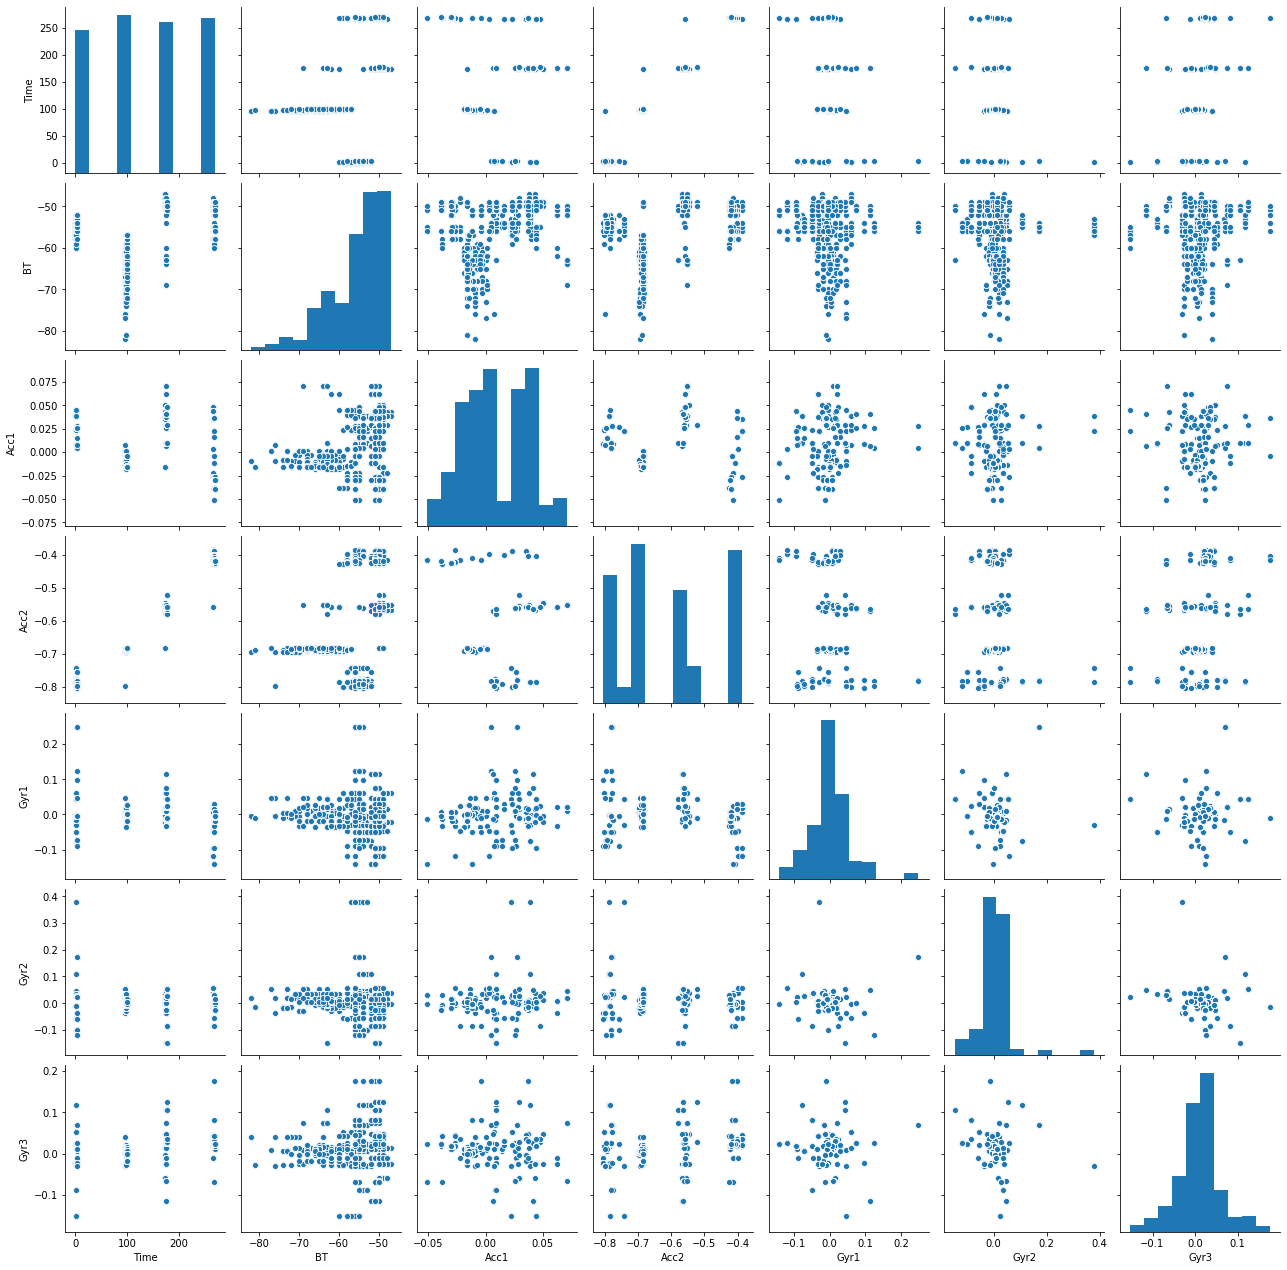

In [8]:
sns.pairplot(data2)

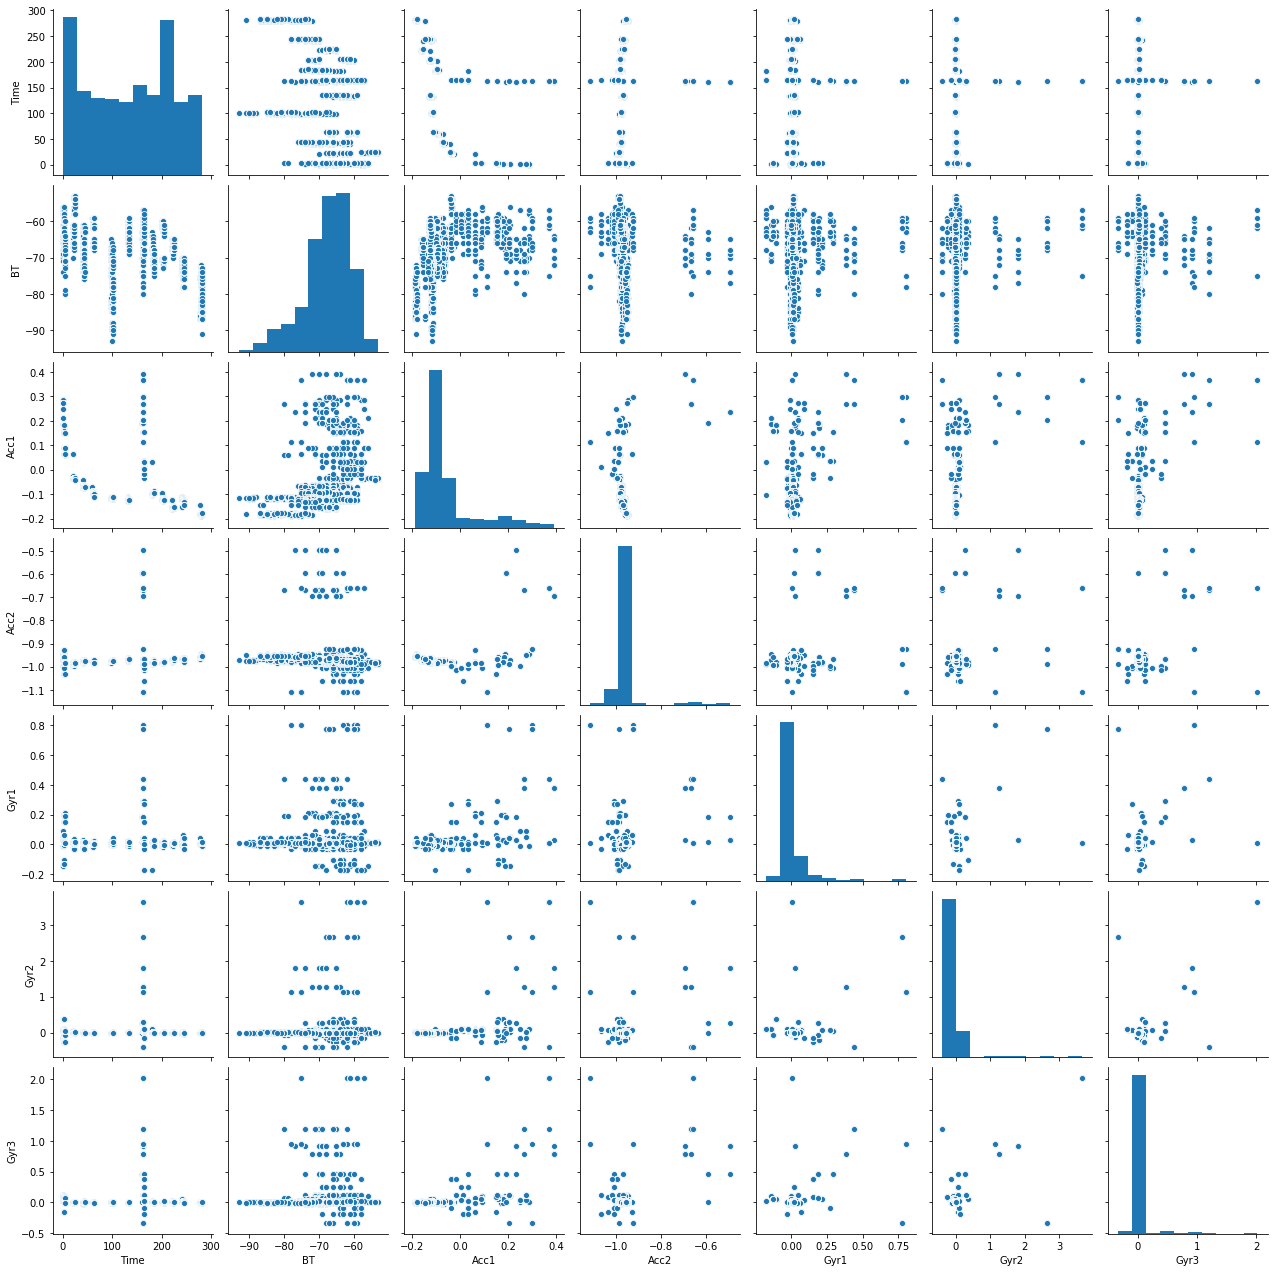

In [9]:
sns.pairplot(data5)

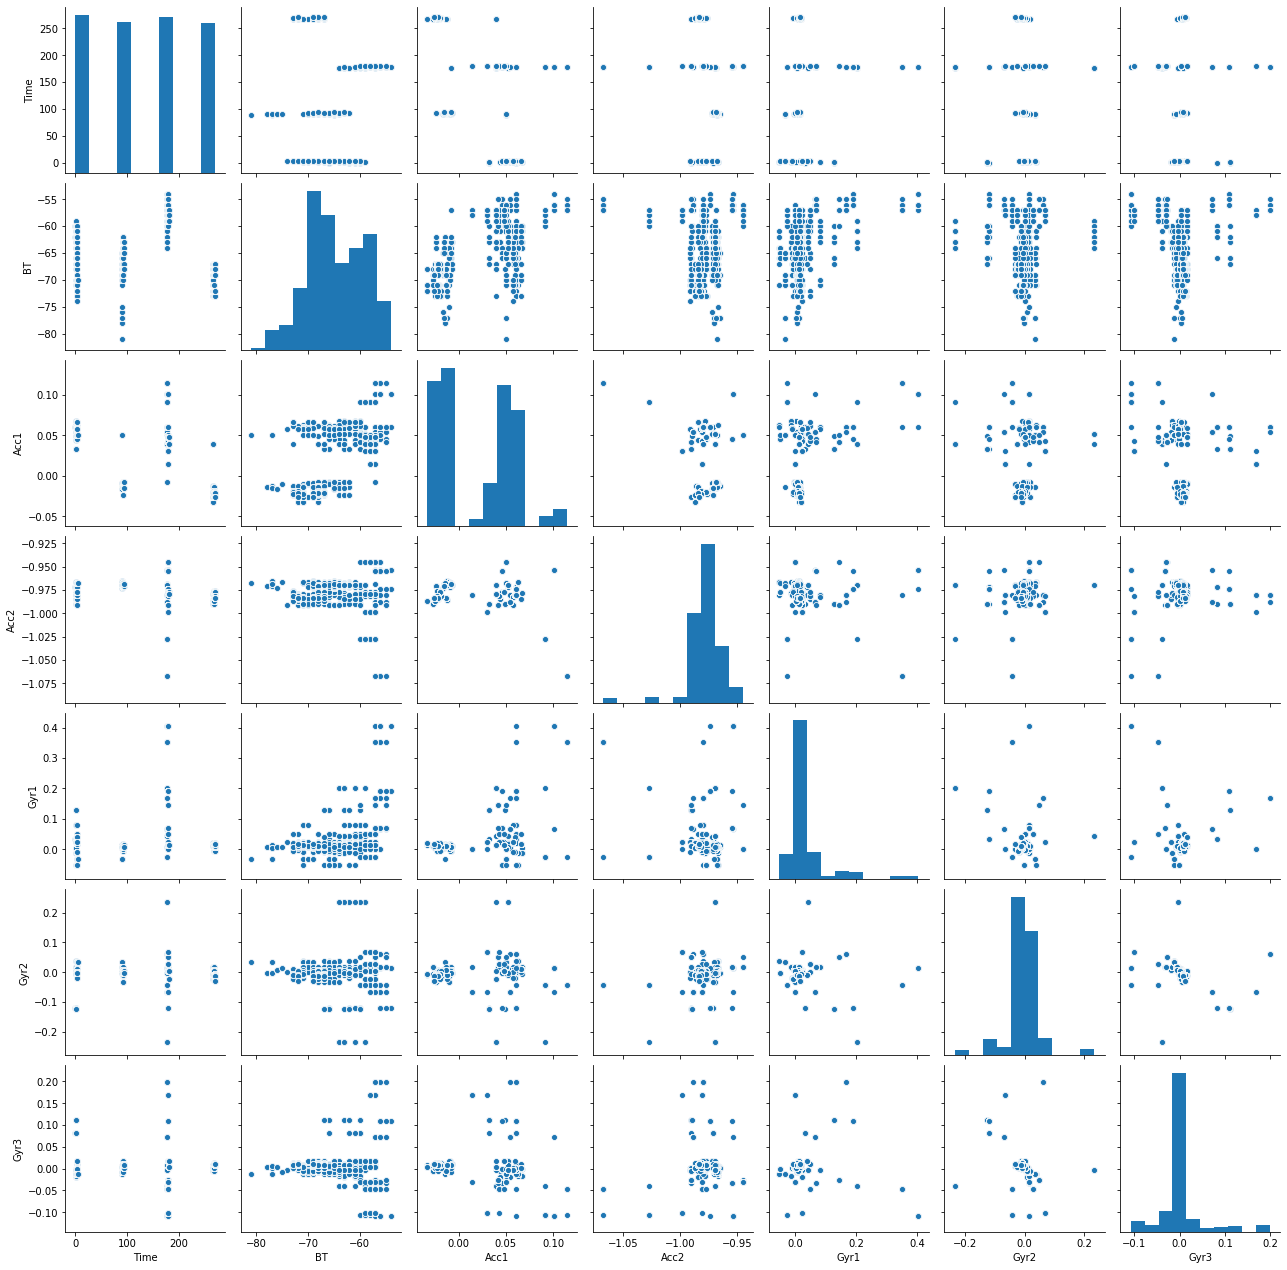

In [10]:
sns.pairplot(data8)

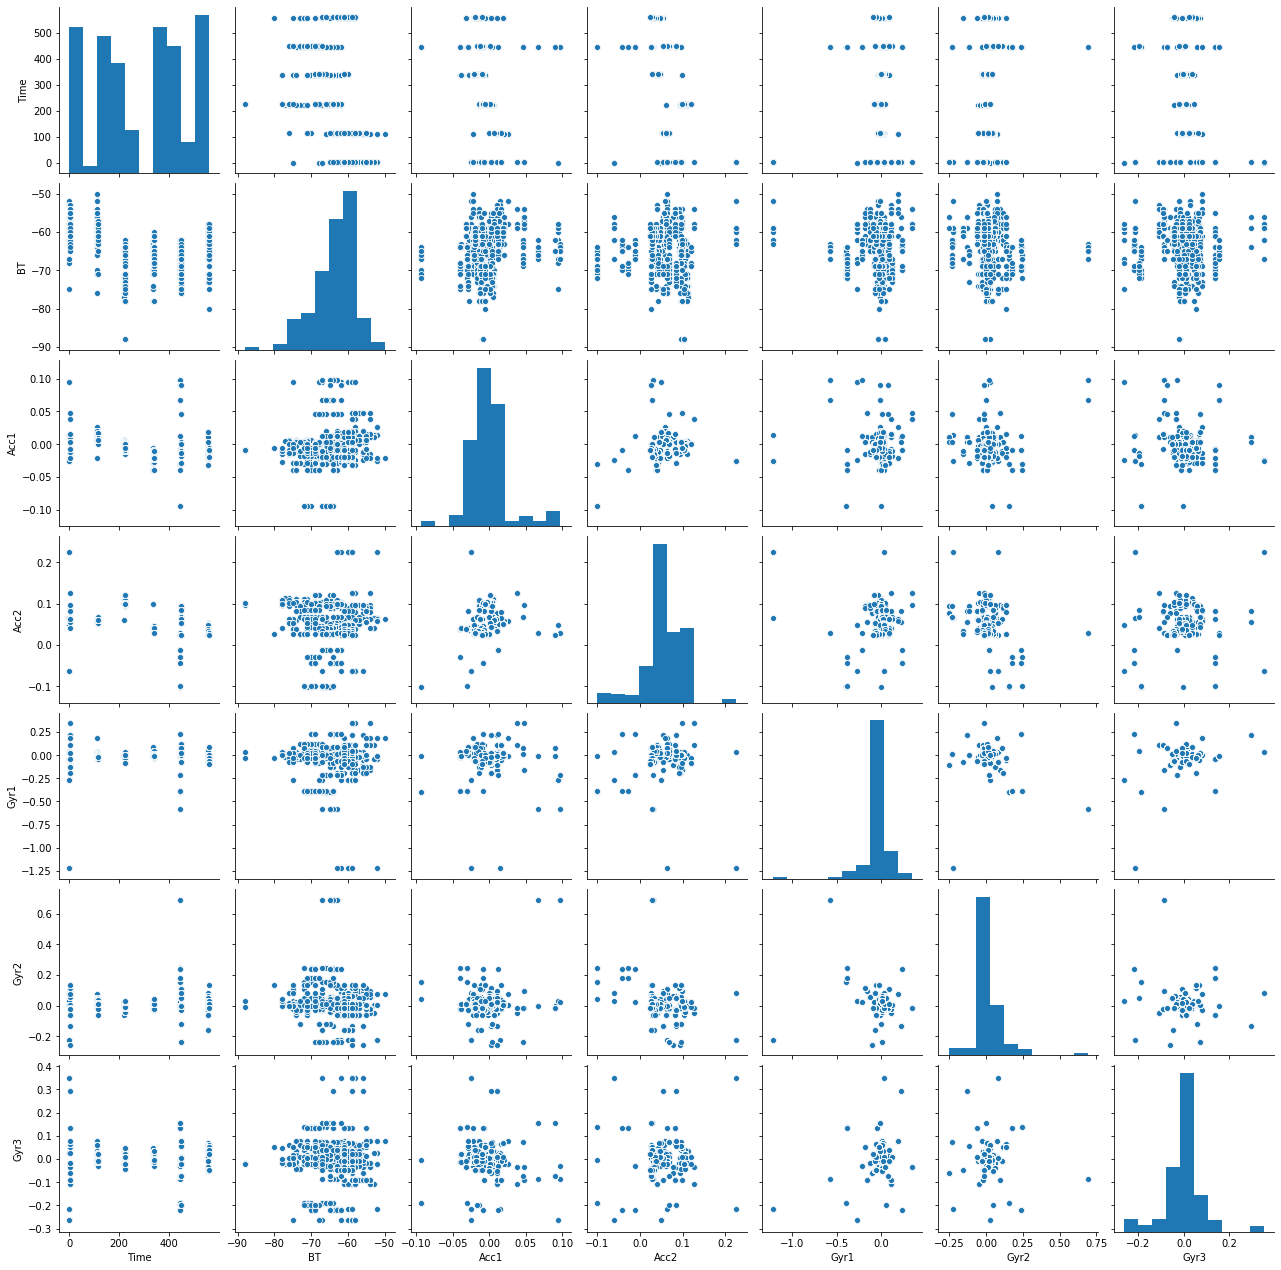

In [11]:
sns.pairplot(data11)

It appears that these variables (excluding time) can be represneted accurately by their summary statistics (mean, variance, skewness, 10th and 90th percentiles). This allows us to implement a much simpler model while preserving as much accuracy as possible